## Agenda To Detect the Faces in Images
 - HardCase Classifier (To detect the Face Detect this one is old one And Perform Well Now day)
 - DeepFace ( this Libary is very PowerFull)
 - Face-Recogantion()

### Face Detection using the HardCaseCllassifaction


In [3]:
# All Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
cascade_path = "models/haarcascade_frontalface_alt.xml"
image_path = "images/Pan_Card.png"

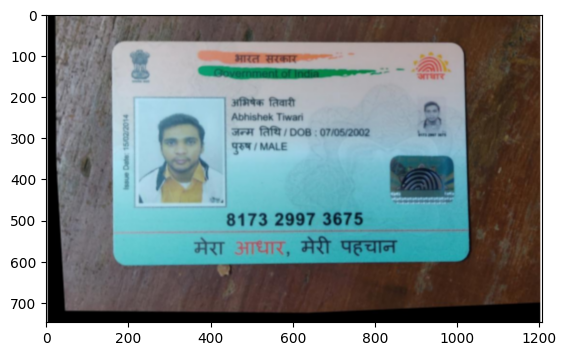

In [8]:
img = cv2.imread(image_path)
rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

## Note! Mostly Opencv opercation or computer vision opertaion are perform on the GrayScale Image

In [9]:
gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)


In [10]:
face_cascade = cv2.CascadeClassifier(cascade_path)

In [12]:
faces = face_cascade.detectMultiScale(gray , scaleFactor=1.1 , minNeighbors=5)
faces

array([[914, 220,  45,  45],
       [269, 267, 116, 116]])

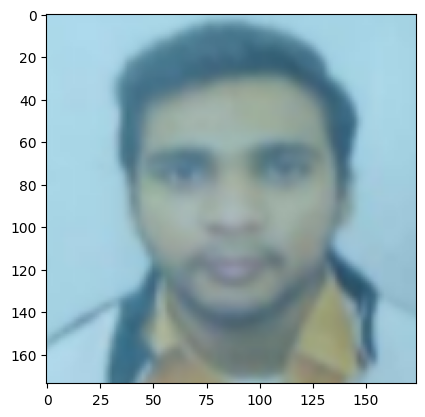

In [20]:
# Extract the Face on the Origin images or say the Crop the images
max_area = 0
largest_face = None


for (x , y , w ,h) in faces:
    area = w * h
    if  area > max_area:
        max_area = area
        largest_face = (x , y , w ,h)
# Extract the large faces area
if largest_face is not None:
    (x , y , w, h)  = largest_face

    # Increase Dimesstion by 15 % 
    new_w = int(w*1.50)
    new_h = int(h*1.50)


    new_x = max(0 , x - int((new_w - w ) / 2))
    new_y = max(0 , y - int((new_h -h )/2))

    # Extract the Faces
    extract_faces = rgb[new_y:new_y+new_h , new_x:new_x+new_w]

plt.imshow(extract_faces)

### DeepFace is Advance Version of 
 - we can perform the multiple thing using the DeepFace
 - by default - DeepFace , DeepId , Face Recogantio  , Feace Detection , Emot.. Detection , using the VGg nd google net throw 

In [1]:
import deepface as dfa
# from dfa import DeepFace
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten


c:\Users\Sachin2\Desktop\Project\eKYC\myenv\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.19.5)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [9]:
from deepface import DeepFace


24-07-24 18:05:21 - Directory C:\Users\Sachin2/.deepface created
24-07-24 18:05:21 - Directory C:\Users\Sachin2/.deepface/weights created


In [10]:
import pandas

In [12]:
# Load The Two Images So That You can Compare
path1 = "Images_Data/four/guru1.png"
path2 = "Images_Data/four/guru2.png"

In [13]:
verification = DeepFace.verify(img1_path=path1 , img2_path=path2)

24-07-24 18:10:11 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\Sachin2\.deepface\weights\vgg_face_weights.h5
100%|██████████| 580M/580M [00:51<00:00, 11.3MB/s] 


In [14]:
verification

{'verified': True,
 'distance': 0.5016599901145449,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 86,
   'y': 43,
   'w': 84,
   'h': 84,
   'left_eye': (143, 76),
   'right_eye': (111, 74)},
  'img2': {'x': 88,
   'y': 60,
   'w': 105,
   'h': 105,
   'left_eye': (158, 103),
   'right_eye': (122, 98)}},
 'time': 55.22}

In [16]:
embedding_objs = DeepFace.represent(img_path=path1)
embedding_objs

[{'embedding': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.032520972128666926,
   0.0,
   0.032684335598225034,
   0.0,
   0.0,
   0.0,
   0.020478719967351504,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.036486724034501886,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.01889855171797097,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.02217384636915427,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.022389508691311445,
   0.0,
   0.02083672751744805,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.03903014766438352,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.023691470521280313,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.

In [17]:
embedding = embedding_objs[0]['embedding']
len(embedding)

4096

In [18]:
models = [
    'VGG-Face',
    'Facenet',
]

In [19]:
result = DeepFace.verify(img1_path=path1 , img2_path=path2 , model_name=models[1])

24-07-24 18:16:20 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\Sachin2\.deepface\weights\facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:09<00:00, 9.94MB/s]


In [20]:
result['verified']

True